# Modelling spreading of infectious diseases
This is an experimental model made in a few hours. Inspirered by https://triplebyte.com/blog/modeling-infectious-diseases. 

The model is purely for testing the capabilities of ModelFlow, the parameters selected are for ilustration of the dynamic
and is not an estimate. 

To run the model select **cell>run all** in the menu

Then press the run button in the user interaction section. 

Use the sliders to change the input parameters

This is a Jupyter Notebook running Python. 

## Import some stuff

In [147]:
import pandas as pd
from ipywidgets import interact,Dropdown,Checkbox,Layout,FloatSlider

from modelsandbox import newmodel
import modelclass as mc
import modelmanipulation as mp 
from modeljupyter import inputwidget,get_alt,vis_alt3

##  Specify Model
The model is specified as equations. The equations defines the daily transition between the states:

 - susciptible
 - exposed
 - infectious
 - recovered
 - dead 
 
Some conventions:
 - (-1) after a variable means the value the day before.
 - diff means the change in variable from the day before

In [139]:
rcorona = '''\
             infection_rate        = min(rate_contact * probability_transmision * infectious(-1) / population(-1),1.0) 
             new_exposed           = infection_rate * susceptible
             diff(exposed)         = new_exposed - new_infectious + exo_exposed

             new_infectious        = incubation_rate * exposed 
             diff(infectious)      = new_infectious - new_recovered  - new_dead

             diff(susceptible)     = -new_exposed  

             new_recovered         = recovery_rate * infectious(-1)
             diff(recovered)       = new_recovered 
             
             new_dead              = dead_rate * infectious(-1)
             diff(dead)            = new_dead 
             diff(population)      = -diff(dead)             
'''

# Create a model instance
We want to be able to calculate with the model. So a Python instance **mcorona** is created. 

In [140]:
fcorona = mp.explode(rcorona)
mcorona = newmodel(fcorona)

## Define an initial scenario 
Now a tabel with data is created. Each column containg a variable for the model. Each row contains the values for a day. 

The tabel is implemented as a Pandas Dataframe. 

**The initial population is set to 1,000,000**

You don't have to understand the python code below. 

In [149]:
DAYS = 500
basedf = pd.DataFrame(index=range(DAYS))       # make an empty dataframe with DAYS rows
#basedf.index.name = Days
grunddf = mc.insertModelVar(basedf,mcorona)    # fill dataframe with variables and zeros 
grunddf.index.name = 'Day'

# now input some starting values, and parameters 
grunddf.loc[0,'POPULATION']= 1000000           # we need a population for the first day 
grunddf['SUSCEPTIBLE'] = grunddf['POPULATION'] # we also need a value for the number of susceptible
grunddf.loc[1,'EXO_EXPOSED']             = 300           # we need a population for the first day 
grunddf.loc[:,'INCUBATION_RATE']         = 0.1           # 
grunddf.loc[:,'DEAD_RATE']               = 0.01          #  
grunddf.loc[:,'RECOVERY_RATE']           = 0.1           #  
grunddf.loc[:,'RATE_CONTACT']            = 4             #  
grunddf.loc[:,'PROBABILITY_TRANSMISION'] = 0.05           #  

## Run the scenario

In [150]:
startdf = mcorona(grunddf,antal=20,first_test=10,silent=1)

## Define an alternative scenario (increase rate of contact to 6), run it and show the results run it 

In [156]:
mulbk = grunddf.copy()
mulbk.loc[:,'RATE_CONTACT']            = 6             #  
mulres = mcorona(muldf,antal=20,first_test=10,silent=1)
vis_alt3(get_alt(mcorona,'infectious recovered dead new_infectious new_recovered new_dead'),mcorona,basename='4 contacts',altname='6 contacts');

## Make eksperiments 
Now you can make your own experiment. Use the sliders to define an experiment. Then press the run button. The model will solve, and the results can be inspected in the output widget. 

### Define the user-interface

In [157]:
cow = inputwidget(mcorona,startdf,modelopt={'silent':0},
                  slidedef = {
                     'Number of infected t=1'     :{'var' : 'EXO_EXPOSED','min' : 0.0, 'max' : 1000, 'value' : 300,'step':10,'op':'=impulse'},
                     'Daily incuberation rate'    :{'var' : 'INCUBATION_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.1},
                     'Daily death rate'           :{'var' : 'DEAD_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.01},
                     'Daily recovery rate'        :{'var' : 'RECOVERY_RATE','min' : 0.0, 'max' : 1.0, 'value' : 0.1},
                     'Daily rate of contact'      :{'var' : 'RATE_CONTACT','min' : 0.0, 'max' : 100, 'value' : 6,'step':1},
                     'Probability of transmission':{'var' : 'PROBABILITY_TRANSMISION','min' : 0.0, 'max' : 1.0, 'value' : 0.05},
                             },
                 varpat='infectious recovered dead new_infectious new_recovered new_dead',base1name='4 Contact',alt1name='6 Contacts')

# User interaction 
Press the Run button to run the experiment. Inspect the results in the tabs. 

Adjust the parameters, press run and watch how the values changes

In [158]:
display(cow)

## The structure of the model 
The mmodel instance has a number of capabilities. It can for instance draw the relationship between the variables. 

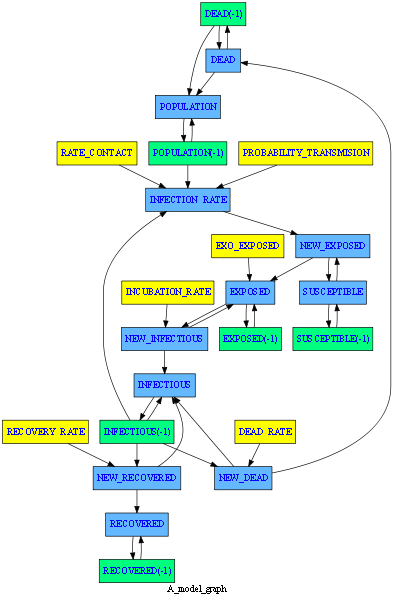

In [146]:
mcorona.drawmodel(size= (2,2))